Importing Libraries:

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

#For Feature Engineering (Removing Imbalance in the data) 
from imblearn.over_sampling import SMOTE

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

Loading, Merging and Cleaning of Train data:

In [3]:
# loading train_transaction data
train_transaction = pd.read_csv('C:\\Users\\Tanish\\Stats EndExam\\train_transaction.csv')
print(train_transaction.shape)
train_transaction = reduce_mem_usage(train_transaction)
train_transaction.head()

(590540, 394)
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Loading train_identity data
train_identity = pd.read_csv('C:\\Users\\Tanish\\Stats EndExam\\train_identity.csv')
print(train_identity.shape)
train_identity = reduce_mem_usage(train_identity)
train_identity.head()

(144233, 41)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.00 MB
Decreased by 77.8%


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
# Merging transaction and identity train data
train_df = pd.merge(train_transaction, train_identity, how='left')
print(train_df.shape)
len_train_df = len(train_df)
del train_transaction, train_identity
train_df.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


Data Understanding and Analysing:

In [6]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.0,588975.0,586281.0,524834.0,524834.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.0,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,NaN,NaN,inf,inf,12.820312,inf,inf,NaN
std,1.704744e+05,0.183755,4.617224e+06,NaN,4901.170153,NaN,0.0,0.0,NaN,0.0,...,0.0,1.561523e+00,NaN,NaN,inf,6.898438,2.373047,97.4375,32.09375,0.0
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,100.0,100.0,100.0,100.0,10.0,...,100.0,1.000000e+01,100.0,100.0,100.0,10.000000,11.000000,100.0000,100.00000,0.0
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,214.0,150.0,166.0,204.0,87.0,...,166.0,1.300000e+01,266.0,256.0,252.0,14.000000,11.000000,321.0000,119.00000,24.0
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.0,150.0,226.0,299.0,87.0,...,166.0,1.500000e+01,341.0,472.0,252.0,14.000000,11.000000,321.0000,149.00000,24.0
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,330.0,87.0,...,225.0,1.500000e+01,427.0,533.0,486.5,14.000000,15.000000,371.0000,169.00000,32.0
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,229.0,2.900000e+01,671.0,661.0,854.0,44.000000,26.000000,548.0000,216.00000,32.0


In [7]:
train_df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [8]:
train_df.nunique()

TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt      8195
ProductCD              5
                   ...  
id_36                  2
id_37                  2
id_38                  2
DeviceType             2
DeviceInfo          1786
Length: 434, dtype: int64

In [9]:
train_df.std()

TransactionID     1.704744e+05
isFraud           1.837546e-01
TransactionDT     4.617224e+06
TransactionAmt    0.000000e+00
card1             4.901170e+03
                      ...     
id_22             6.898438e+00
id_24             2.371094e+00
id_25             9.743750e+01
id_26             3.209375e+01
id_32             0.000000e+00
Length: 403, dtype: float64

Finding Correlation:

In [10]:
train_df.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,...,0.222829,0.111975,-0.015030,0.084105,-0.029004,0.052621,-0.038339,0.020672,0.013670,-0.066437
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,...,0.150100,0.050004,-0.041721,0.061597,0.063544,0.118409,-0.001905,0.034045,0.099587,0.069702
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,...,0.214802,0.110234,-0.011815,0.082009,-0.024249,0.051437,-0.031312,0.020372,0.017790,-0.071392
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109788,0.003061,-0.007421,0.028313,...,-0.334974,-0.096853,0.076174,-0.105868,-0.031841,-0.104620,0.080110,0.016142,0.023098,-0.041851
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,...,0.018892,0.008869,0.022617,0.015917,0.044073,0.016853,0.057550,-0.010192,0.078487,-0.009524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_22,0.052621,0.118409,0.051437,-0.104620,0.016853,-0.024013,0.657624,-0.180340,0.065780,-0.291785,...,0.591957,0.130109,0.063871,0.030765,0.070591,1.000000,0.014067,0.182643,0.281324,-0.041127
id_24,-0.038339,-0.001905,-0.031312,0.080110,0.057550,0.000844,0.011953,-0.018330,-0.032398,-0.037455,...,-0.014895,0.014321,0.245221,-0.189628,0.220933,0.014067,1.000000,-0.030902,0.086002,-0.219537
id_25,0.020672,0.034045,0.020372,0.016142,-0.010192,-0.009787,0.140797,-0.042232,-0.004287,0.004896,...,0.173535,0.108161,-0.008509,-0.028451,-0.147694,0.182643,-0.030902,1.000000,0.011508,0.027603
id_26,0.013670,0.099587,0.017790,0.023098,0.078487,0.006429,0.228904,-0.089528,0.050645,-0.067406,...,0.076164,-0.048799,0.116386,0.048413,0.053721,0.281324,0.086002,0.011508,1.000000,-0.065558


Loading Test data:

In [11]:
# Loading test data
test_transaction = pd.read_csv('C:\\Users\\Tanish\\Stats EndExam\\test_transaction.csv')
print(test_transaction.shape)
test_transaction = reduce_mem_usage(test_transaction)

test_identity = pd.read_csv('C:\\Users\\Tanish\\Stats EndExam\\test_identity.csv')
print(test_identity.shape)
test_identity = reduce_mem_usage(test_identity)

test_df = pd.merge(test_transaction, test_identity, how='left')
test_df.columns = train_df.drop('isFraud', axis=1).columns
print(test_df.shape)
test_df.head()

(506691, 393)
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 425.24 MB
Decreased by 72.0%
(141907, 41)
Memory usage of dataframe is 44.39 MB
Memory usage after optimization is: 9.84 MB
Decreased by 77.8%
(506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Creating a submission file
submission = pd.DataFrame({'TransactionID':test_df.TransactionID})
print(submission.shape)

(506691, 1)


In [13]:
# Duplicates check in train data
train_df.duplicated().sum()

0

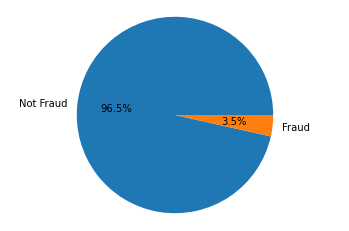

In [14]:
# Class imbalance check
plt.pie(train_df.isFraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

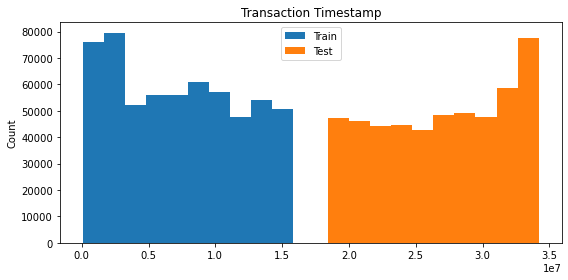

In [15]:
# Timestamp of train and test data
plt.figure(figsize=(8, 4))
plt.hist(train_df['TransactionDT'], label='Train')
plt.hist(test_df['TransactionDT'], label='Test')
plt.ylabel('Count')
plt.title('Transaction Timestamp')
plt.legend()
plt.tight_layout()
plt.show()

Handling Missing Values:

In [16]:
# Missing values check
combined_df = pd.concat([train_df.drop(columns=['isFraud', 'TransactionID']), test_df.drop(columns='TransactionID')])
print(combined_df.shape)

# Dependent variable
y = train_df['isFraud']
print(y.shape)

# Dropping columns with more than 20% missing values 
mv = combined_df.isnull().sum()/len(combined_df)
combined_mv_df = combined_df.drop(columns=mv[mv>0.2].index)
del combined_df, train_df, test_df
print(combined_mv_df.shape)

(1097231, 432)
(590540,)
(1097231, 180)


In [17]:
# Filtering numerical data
num_mv_df = combined_mv_df.select_dtypes(include=np.number)
print(num_mv_df.shape)


(1097231, 176)


In [18]:
# Filtering categorical data
cat_mv_df = combined_mv_df.select_dtypes(exclude=np.number)
print(cat_mv_df.shape)
del combined_mv_df


(1097231, 4)


In [19]:
# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df = pd.DataFrame(imp_median.fit_transform(num_mv_df), columns=num_mv_df.columns)
del num_mv_df
print(num_df.shape)

(1097231, 176)


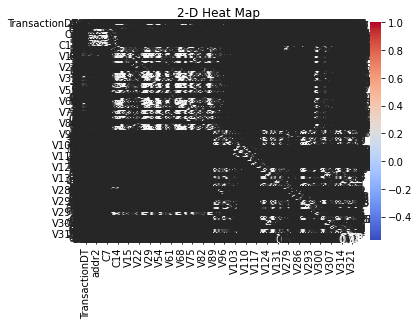

In [20]:
ax = sns.heatmap( num_df.corr() , cmap = 'coolwarm', annot=True )
  
plt.title( "2-D Heat Map" )
plt.show()

In [21]:
# Filling missing values by most frequent value for categorical columns
imp_max = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_df = pd.DataFrame(imp_max.fit_transform(cat_mv_df), columns=cat_mv_df.columns)
del cat_mv_df
print(cat_df.shape)


(1097231, 4)


In [22]:
# Concatinating numerical and categorical data
combined_df_cleaned = pd.concat([num_df, cat_df], axis=1)
del num_df, cat_df

In [23]:
# Verifying missing values
print(f'Total missing values: {combined_df_cleaned.isnull().sum().sum()}')
print(combined_df_cleaned.shape)
combined_df_cleaned.head()

Total missing values: 0
(1097231, 180)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V316,V317,V318,V319,V320,V321,ProductCD,card4,card6,P_emaildomain
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,...,0.0,117.0,0.0,0.0,0.0,0.0,W,discover,credit,gmail.com
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,W,mastercard,credit,gmail.com
2,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,W,visa,debit,outlook.com
3,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,...,50.0,1404.0,790.0,0.0,0.0,0.0,W,mastercard,debit,yahoo.com
4,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,H,mastercard,credit,gmail.com


Data Pre-Processing:

In [24]:
# One-hot encoding
combined_df_encoded = pd.get_dummies(combined_df_cleaned, drop_first=True)
print(combined_df_encoded.shape)
del combined_df_cleaned
combined_df_encoded.head()

(1097231, 245)


,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,86400.0,68.5,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,86401.0,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,86469.0,59.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,86499.0,50.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,...,0,0,0,0,1,0,0,0,0,0
4,86506.0,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Separating train and test data
X = combined_df_encoded.iloc[:len_train_df]
print(X.shape)
test = combined_df_encoded.iloc[len_train_df:]
print(test.shape)
del combined_df_encoded

(590540, 245)
(506691, 245)


In [26]:
# Time-based train validation splitting with 20% data in validation set
train = pd.concat([X, y], axis=1)
train.sort_values('TransactionDT', inplace=True)
X = train.drop(['isFraud'], axis=1)
y = train['isFraud']
splitting_index = int(0.8*len(X))
X_train = X.iloc[:splitting_index].values
X_val = X.iloc[splitting_index:].values
y_train = y.iloc[:splitting_index].values
y_val = y.iloc[splitting_index:].values
test = test.values
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
del y, train

(472432, 245) (118108, 245) (472432,) (118108,)


In [27]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test)
del X_train, X_val, test

# Class imbalance check
pd.value_counts(y_train)

0    455833
1     16599
dtype: int64

Treating Imbalanced data:

In [28]:
# Applying SMOTE to deal with the class imbalance by oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(X_train_smote.shape, y_train_smote.shape)
del X_train_scaled, y_train
pd.value_counts(y_train_smote)

(911666, 245) (911666,)


0    455833
1    455833
dtype: int64

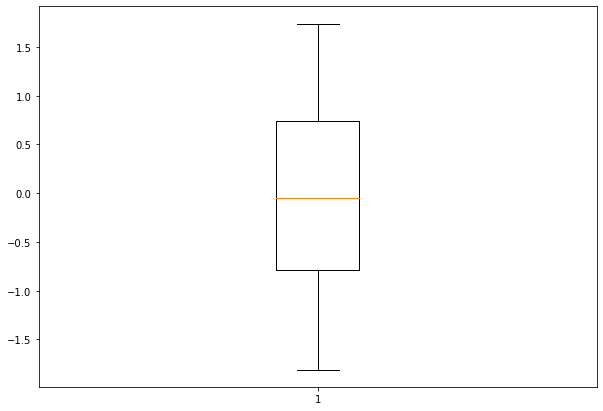

In [29]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(X_train_smote[:,2])
 
# show plot
plt.show()

Applying  Model for ML:

In [30]:
# Random Forest Classifier
rfc = RandomForestClassifier(criterion='entropy', max_features='sqrt', max_samples=0.5, min_samples_split=80)
rfc.fit(X_train_smote, y_train_smote)
y_predproba = rfc.predict_proba(X_val_scaled)
print(f'Validation AUC={roc_auc_score(y_val, y_predproba[:, 1])}')

Validation AUC=0.888650290763587


Finding most and least relevant feature:

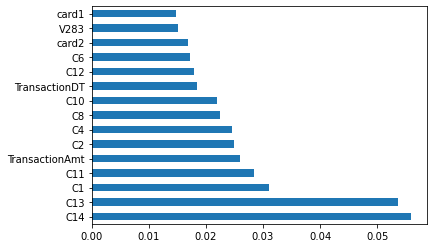

In [31]:
# Feature importances
pd.Series(rfc.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh')
plt.show()

Calculating the fraud probability:

In [32]:
# Predicting for the test data 
predictions = rfc.predict_proba(test_scaled)
submission['isFraud'] = predictions[:, 1]
print(submission.shape)
submission.head()

(506691, 2)


,TransactionID,isFraud
0,3663549,0.058355
1,3663550,0.056603
2,3663551,0.193282
3,3663552,0.041779
4,3663553,0.197188
